In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})

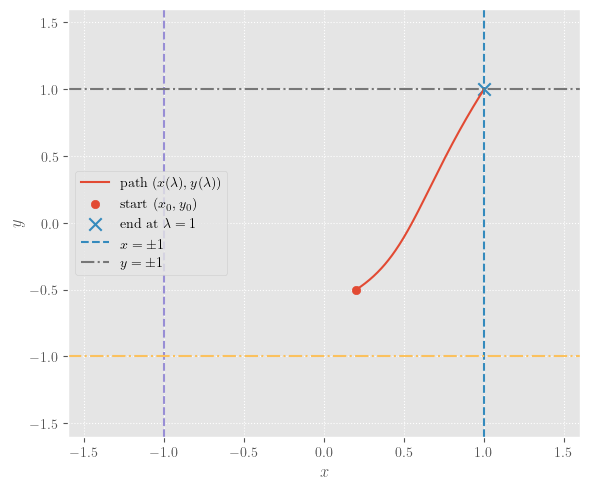

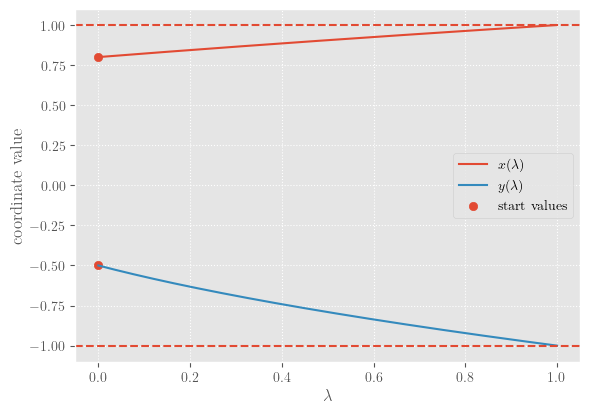

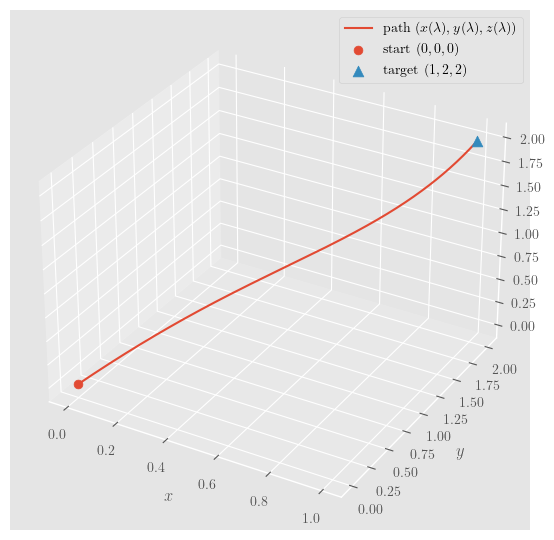

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1) Fixed-point homotopy (2D): path in (x,y) ----------
x0, y0 = 0.2, -0.5

def scalar_fixed_point_path(u0, lambdas):
    """Solve lambda*(u^2-1) + (1-lambda)*(u-u0) = 0 along the branch
    continuous from u(0)=u0 using quadratic formula with continuity tracking."""
    us = []
    prev = u0
    for lam in lambdas:
        if lam == 0.0:
            us.append(u0)
            prev = u0
            continue
        a = lam
        b = (1 - lam)
        c = - (lam + (1 - lam) * u0)
        disc = b*b - 4*a*c
        r1 = (-b + np.sqrt(disc)) / (2*a)
        r2 = (-b - np.sqrt(disc)) / (2*a)
        u = r1 if abs(r1 - prev) <= abs(r2 - prev) else r2
        us.append(u)
        prev = u
    return np.array(us)

lams = np.linspace(0, 1, 300)
x_path = scalar_fixed_point_path(x0, lams)
y_path = scalar_fixed_point_path(y0, lams)

plt.figure(figsize=(6, 5))
plt.plot(x_path, y_path, label=r"path $(x(\lambda),y(\lambda))$")
plt.scatter([x0], [y0], marker="o", label="start $(x_0,y_0)$")
plt.scatter([x_path[-1]], [y_path[-1]], marker="x", s=80, label="end at $\\lambda=1$")
plt.plot([1, 1], [-1.6, 1.6], linestyle="--", label="$x=\\pm 1$")
plt.plot([-1, -1], [-1.6, 1.6], linestyle="--")
plt.plot([-1.6, 1.6], [1, 1], linestyle="-.", label="$y=\\pm 1$")
plt.plot([-1.6, 1.6], [-1, -1], linestyle="-.")
plt.xlim(-1.6, 1.6)
plt.ylim(-1.6, 1.6)
plt.xlabel("$x$")
plt.ylabel("$y$")
# plt.title("Fixed-point homotopy: $(x_0,y_0)=(0.2,-0.5)$")
plt.legend(loc="best")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.savefig("../../../figs/nle/fixed_point_path.pdf", transparent=True)
plt.show()

# ---------- 2) Newton homotopy (2D): x(λ) and y(λ) vs λ ----------
x0N, y0N = 0.8, -0.5
lamsN = np.linspace(0, 1, 400)

def newton_branch(u0, lambdas):
    s = np.sign(u0) if u0 != 0 else 1.0
    return s * np.sqrt(1 + (1 - lambdas) * (u0*u0 - 1))

x_newton = newton_branch(x0N, lamsN)
y_newton = newton_branch(y0N, lamsN)

plt.figure(figsize=(6, 4.25))
plt.plot(lamsN, x_newton, label="$x(\\lambda)$")
plt.plot(lamsN, y_newton, label="$y(\\lambda)$")
plt.scatter([0, 0], [x0N, y0N], marker="o", label="start values")
plt.axhline(1, linestyle="--")
plt.axhline(-1, linestyle="--")
plt.xlabel("$\\lambda$")
plt.ylabel("coordinate value")
# plt.title("Newton homotopy: coordinate paths vs. $\\lambda$")
plt.legend(loc="best")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.savefig("../../../figs/nle/newton_homotopy_lambda.pdf", transparent=True)
plt.show()

# ---------- 3) Linear start system (3D): path in (x,y,z) ----------
lams3 = np.linspace(0, 1, 300)

def linear_branch_x(lam):
    if lam == 1.0:
        return 1.0
    if lam == 0.0:
        return 0.0
    a = lam
    b = (1 - lam)
    c = -lam
    disc = b*b - 4*a*c
    r1 = (-b + np.sqrt(disc)) / (2*a)
    r2 = (-b - np.sqrt(disc)) / (2*a)
    return r1 if abs(r1) <= abs(r2) else r2

def linear_branch_y(lam):
    if lam == 1.0:
        return 2.0
    if lam == 0.0:
        return 0.0
    a = lam
    b = (1 - lam)
    c = -4*lam
    disc = b*b - 4*a*c
    r1 = (-b + np.sqrt(disc)) / (2*a)
    r2 = (-b - np.sqrt(disc)) / (2*a)
    return r1 if abs(r1) <= abs(r2) else r2

x3 = np.array([linear_branch_x(l) for l in lams3])
y3 = np.array([linear_branch_y(l) for l in lams3])
z3 = 2 * lams3

fig = plt.figure(figsize=(6.5, 5.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x3, y3, z3, label=r"path $(x(\lambda),y(\lambda),z(\lambda))$")
ax.scatter([0], [0], [0], marker="o", s=40, label="start $(0,0,0)$")
ax.scatter([1], [2], [2], marker="^", s=60, label="target $(1,2,2)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
# ax.set_title("Linear start system homotopy path (3D)")
ax.legend(loc="best")
plt.tight_layout()
plt.savefig("../../../figs/nle/linear_homotopy_3d.pdf", transparent=True)
plt.show()

[(np.float64(0.5710164383422719), np.float64(0.6854681434528211)), (np.float64(1.6916705039879978), np.float64(6.763721348555438))]


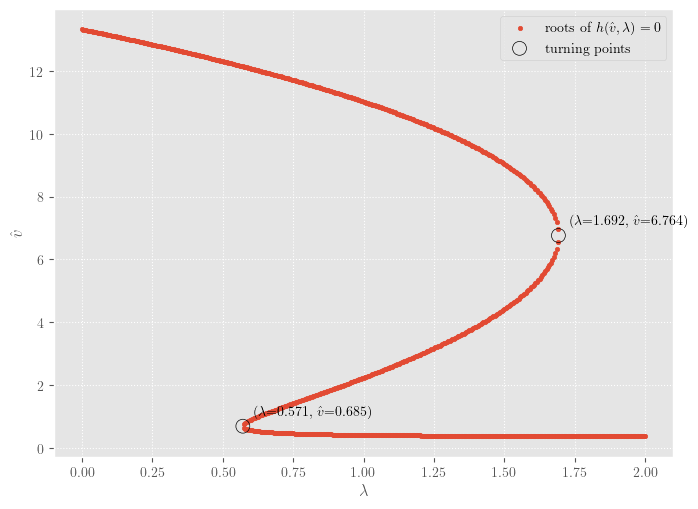

In [ ]:
P_hat, T_hat = 0.1, 0.5

def f_vdw(v):
    return (P_hat + 3.0/(v**2))*(v - 1.0/3.0) - (8.0/3.0)*T_hat

def g_ideal(v):
    return P_hat*v - (8.0/3.0)*T_hat

def h(v, lam):
    return lam*f_vdw(v) + (1.0 - lam)*g_ideal(v)

def fp(v):  # f'(v)
    return P_hat - 3.0/(v**2) + 2.0/(v**3)

def gp(v):  # g'(v)
    return P_hat + 0.0*v

# Fold condition for scalar homotopy: f*g' - g*f' = 0
def fold_F(v):
    return f_vdw(v)*gp(v) - g_ideal(v)*fp(v)

def bisection_root_scalar(func, a, b, maxit=120, tol=1e-12):
    fa, fb = func(a), func(b)
    if not np.isfinite(fa) or not np.isfinite(fb) or fa*fb > 0:
        return None
    for _ in range(maxit):
        c = 0.5*(a+b); fc = func(c)
        if not np.isfinite(fc):
            return None
        if abs(fc) < tol or 0.5*(b-a) < tol:
            return c
        if fa*fc <= 0: b, fb = c, fc
        else: a, fa = c, fc
    return 0.5*(a+b)

def all_roots_at_lambda(lam, vmin=1e-3, vmax=60.0, n_lin=6000, n_log=4000):
    v_lin = np.linspace(vmin, vmax, n_lin)
    v_log = np.geomspace(max(vmin, 1e-3), vmax, n_log)
    vgrid = np.unique(np.concatenate([v_lin, v_log]))
    vals = h(vgrid, lam)
    roots = []
    for i in range(len(vgrid)-1):
        va, vb = vgrid[i], vgrid[i+1]
        ya, yb = vals[i], vals[i+1]
        if np.isfinite(ya) and np.isfinite(yb) and ya*yb < 0:
            r = bisection_root_scalar(lambda v: h(v, lam), va, vb)
            if r is not None and r > 0:
                roots.append(r)
    roots.sort()
    # deduplicate
    clean = []
    for r in roots:
        if len(clean)==0 or abs(r-clean[-1])>1e-7:
            clean.append(r)
    return clean

def find_turning_points(vmin=1e-3, vmax=60.0, n_lin=8000, n_log=6000):
    v_lin = np.linspace(vmin, vmax, n_lin)
    v_log = np.geomspace(max(vmin, 1e-3), vmax, n_log)
    vgrid = np.unique(np.concatenate([v_lin, v_log]))
    F = fold_F(vgrid)
    turns_v = []
    for i in range(len(vgrid)-1):
        va, vb = vgrid[i], vgrid[i+1]
        Fa, Fb = F[i], F[i+1]
        if not (np.isfinite(Fa) and np.isfinite(Fb)):
            continue
        if Fa == 0.0:
            turns_v.append(va)
        elif Fa*Fb < 0:
            r = bisection_root_scalar(fold_F, va, vb)
            if r is not None:
                turns_v.append(r)
    # dedupe
    tv = []
    for r in sorted(turns_v):
        if not tv or abs(r - tv[-1]) > 1e-6:
            tv.append(r)
    # map v* to λ* = -g/(f-g)
    turns = []
    for vstar in tv:
        fval = f_vdw(vstar); gval = g_ideal(vstar)
        denom = fval - gval
        if denom == 0: 
            continue
        lamstar = - gval / denom
        if np.isfinite(lamstar):
            turns.append((lamstar, vstar))
    return sorted(turns, key=lambda t: t[0])

# Sweep λ in [0, 2]
lams = np.linspace(0.0, 2.0, 401)
lam_all, v_all = [], []
for la in lams:
    for r in all_roots_at_lambda(la):
        lam_all.append(la); v_all.append(r)

# Exact folds
turn_points = find_turning_points()

# Plot
plt.figure(figsize=(7.2, 5.2))
plt.scatter(lam_all, v_all, s=10, label="roots of $h(\\hat v,\\lambda)=0$")
if turn_points:
    print(turn_points)
    lam_t, v_t = zip(*turn_points)
    plt.scatter(lam_t, v_t, facecolors='none', marker='o', s=100, label="turning points", color="black")
    for (la, vv) in turn_points:
        plt.annotate(f"($\\lambda$={la:.3f}, $\\hat v$={vv:.3f})",
                     (la, vv), textcoords="offset points", xytext=(8,8))
plt.xlabel("$\\lambda$")
plt.ylabel("$\\hat v$")
plt.grid(True, linestyle=":")
plt.legend(loc="best")
plt.tight_layout()
plt.savefig("../../../figs/nle/vdw_homotopy_branches.pdf", transparent=True)
plt.show()